In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

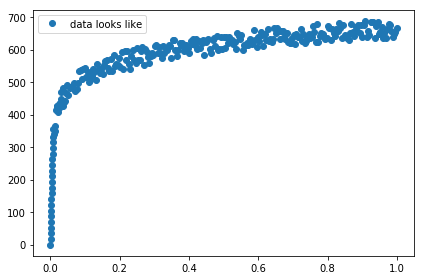

In [26]:
data = np.loadtxt("E:/nmtuan97/1_scripts/ml_learning/data_test.csv", delimiter=',')
X = data[:,:1]
y = data[:,1:2]

X = MinMaxScaler().fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

X_test = np.sort(X_test, axis=0)
y_test = np.sort(y_test, axis=0)
y_test = y_test.flatten()

plt.plot(X, y, 'o', label='data looks like')
plt.legend()
plt.tight_layout()
plt.show()

Voting Regressor: Training set will be trained using different training algorithms (eg. SVM, DecisionTree,...), and then the total prediction will be made from different model to get the highest score.

In [50]:
# Voting Regressor:
svr_ = SVR(kernel = 'rbf', C=100000, gamma=500)
dtree_ = DecisionTreeRegressor(max_depth=5)
rf_rg_ = RandomForestRegressor()

voting_rg = VotingRegressor(estimators=[('svr', svr_), ('dtree', dtree_), ('rf', rf_rg_)])
voting_rg.fit(X_train,y_train)

c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingRegressor(estimators=[('svr', SVR(C=100000, gamma=500)),
                            ('dtree', DecisionTreeRegressor(max_depth=5)),
                            ('rf', RandomForestRegressor())])

In [51]:
from sklearn.metrics import r2_score
for rg in (svr_, dtree_, rf_rg_, voting_rg):
    rg.fit(X_train,y_train)
    y_pred = rg.predict(X_test)
    print(rg.__class__.__name__, r2_score(y_test, y_pred))

c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR 0.9819727218789839
DecisionTreeRegressor 0.9855216493979652
RandomForestRegressor 0.9835949240605282


C:\Users\minht\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingRegressor 0.9872302452127419


One way to get a diverse set of classifiers is to use very different training algorithms, as just discussed. Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set.

In [62]:
# Bagging
from sklearn.ensemble import BaggingRegressor

bag_rg_ = BaggingRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=5000, max_samples=180, bootstrap=True, n_jobs=None, oob_score=True)
bag_rg_.fit(X_train,y_train)
y_pred = bag_rg_.predict(X_test)
print(r2_score(y_test,y_pred))
bag_rg_.oob_score_

c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9897125999295843


0.982736371772825

In [73]:
# Random Forest
rf_rg_ = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=None)
rf_rg_.fit(X_train,y_train)
y_pred = rf_rg_.predict(X_test)
print(r2_score(y_test,y_pred))

0.9884359788735683


C:\Users\minht\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
